In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix,f1_score,precision_score,RocCurveDisplay,accuracy_score,roc_curve,roc_auc_score,recall_score , classification_report
from mlxtend.plotting import plot_confusion_matrix

# Data Exploring

In [3]:
nsl_train = pd.read_csv("D:/semester 7/Major project/Data set/NSLKDD/kdd_train/kdd_train.csv")

In [4]:
nsl_train.shape

(125973, 42)

In [5]:
nsl_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [6]:
nsl_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
nsl_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [8]:
nsl_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
nsl_train['labels'].value_counts()


normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

# Data Preprocessing 

In [10]:
# Redistribute across common attack class
def change_labels(df):
  df.labels.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.labels.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.labels.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.labels.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [11]:
change_labels(nsl_train)

In [12]:
# distribution of attack classes
nsl_train.labels.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64

In [13]:
data_train = nsl_train.copy()  #Copy raw data as nsl.train

In [14]:
data_train.duplicated().sum()

9

In [15]:
data_train_no_duplicates =data_train.drop_duplicates()
data_train.duplicated().sum()

9

In [16]:
#A function to calculate and print out the missing value and it percentage 
def calculate_null_values(dataframe):
    d_frame = dataframe
    # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
    # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
    # add colume header to the dataframe
    d_frame_null_values.columns = ['Field_names', 'Null_value']
    #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] = d_frame_null_value_percentage[0]
    return d_frame_null_values
    

In [17]:
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,duration,0,0.0
1,protocol_type,0,0.0
2,service,0,0.0
3,flag,0,0.0
4,src_bytes,0,0.0
5,dst_bytes,0,0.0
6,land,0,0.0
7,wrong_fragment,0,0.0
8,urgent,0,0.0
9,hot,0,0.0


In [18]:
#No null values

In [19]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [20]:
v_counts(data_train)

0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
_____________________________________________________________________________
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
_____________________________________________________________________________
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
_____________________________________________________________________________
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
__________________

In [21]:
#transfer the column "labels" to only two classes , normal and atttck
# any thing not normal is attack 

list1 = data_train.labels.unique()
for i in list1:
    if i != 'normal':
        data_train.labels = data_train.labels.str.replace(i,'attack')

In [22]:
v_counts(data_train)

0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
_____________________________________________________________________________
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
_____________________________________________________________________________
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
_____________________________________________________________________________
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
__________________

<Axes: xlabel='labels', ylabel='count'>

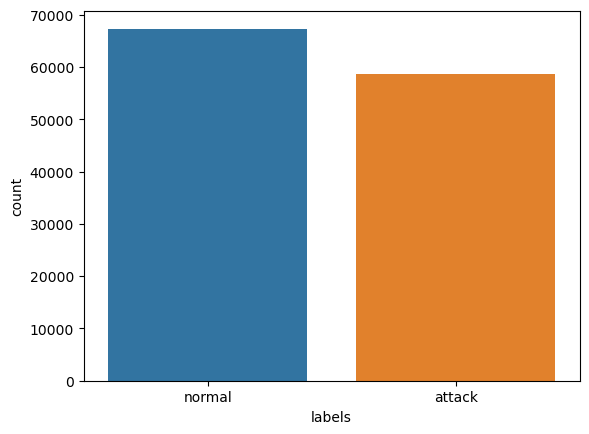

In [23]:
sns.countplot(x=data_train['labels'])


In [24]:
#now labels is only normal and attck 

# Data encoding 

In [25]:
l_encoder = LabelEncoder()

In [26]:
data_train['protocol_type'] = l_encoder.fit_transform(data_train['protocol_type'])
data_train['service'] = l_encoder.fit_transform(data_train['service'])
data_train['flag'] = l_encoder.fit_transform(data_train['flag'])
data_train['labels'] = l_encoder.fit_transform(data_train['labels'])

In [27]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
labels = pd.DataFrame(data_train.labels)
le2 = preprocessing.LabelEncoder()
enc_label = labels.apply(le2.fit_transform)
data_train['intrusion'] = enc_label
print(data_train.shape)
data_train

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,intrusion
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,1
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,1
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,0
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,1
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,0
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,1
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1,1
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,0


In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int32  
 2   service                      125973 non-null  int32  
 3   flag                         125973 non-null  int32  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Split the data 

In [30]:
x = data_train.drop(['labels'] , axis=1).values
y = data_train['labels'].values

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state= 42)

In [32]:
print(x_train.shape , x_test.shape)

(88181, 42) (37792, 42)


# Data Scalling 

In [33]:
scalar = StandardScaler()


In [34]:
x_train = scalar.fit_transform(x_train)

In [35]:
x_test = scalar.fit_transform(x_test)

In [36]:

print(x_train.shape , x_test.shape)

(88181, 42) (37792, 42)


In [37]:
x_train

array([[-0.10935359, -0.12899097, -0.43995907, ...,  2.8739126 ,
         2.75272037,  0.93052118],
       [-0.10935359, -0.12899097,  1.09047566, ..., -0.38803283,
        -0.37675827, -1.07466657],
       [-0.10935359, -0.12899097, -0.43995907, ..., -0.38803283,
        -0.34546348,  0.93052118],
       ...,
       [-0.10935359, -0.12899097, -0.43995907, ...,  2.8739126 ,
         2.75272037, -1.07466657],
       [-0.10935359, -0.12899097, -0.43995907, ..., -0.38803283,
        -0.37675827,  0.93052118],
       [-0.10935359,  2.21482792, -1.17456774, ..., -0.38803283,
        -0.37675827,  0.93052118]])

# SVM model

**Run SVM with default hyperparameters**

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

**RBF**

In [38]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.9999
Test set score: 0.9995


In [39]:
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(20)

,Y_test,Y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


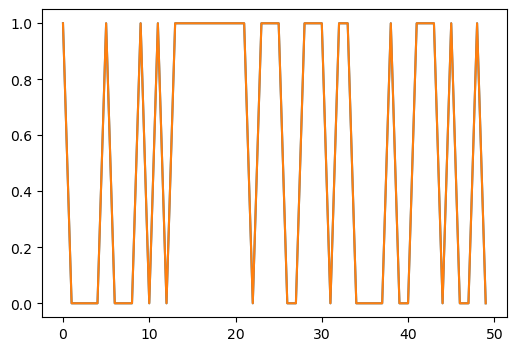

In [40]:
plt.figure(figsize=(6,4))
plt.plot(data[:50])

**Evaluation**

In [41]:
conf_mat=confusion_matrix(y_test,y_pred , labels=[1 , 0])
conf_mat

array([[20081,     2],
       [   17, 17692]], dtype=int64)

(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

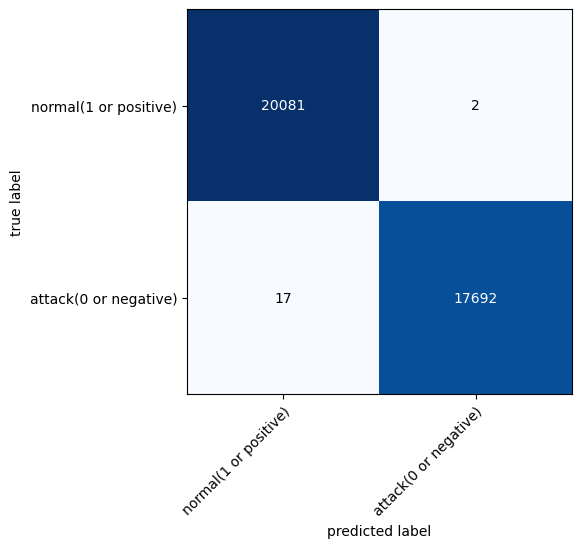

In [42]:
plot_confusion_matrix(conf_mat,class_names=[ "normal(1 or positive)" ,"attack(0 or negative)" ],figsize=(12,5))

In [43]:
print(" F1-score",f1_score(y_test,y_pred,average='micro'))
print(" Recall: ",recall_score(y_test,y_pred,average='micro'))
print(" precision: ",precision_score(y_test,y_pred,average='micro'))

 F1-score 0.9994972480948349
 Recall:  0.9994972480948349
 precision:  0.9994972480948349


In [44]:
matrixx = classification_report(y_test,y_pred , labels=[1,0] )
print(matrixx)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20083
           0       1.00      1.00      1.00     17709

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



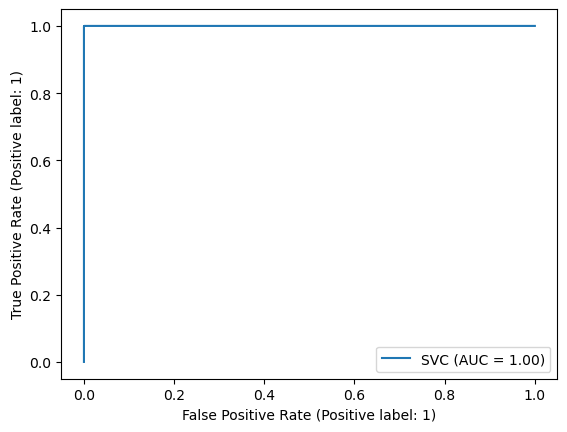

In [45]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)

**linear** 

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear') 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


print('Training set score: {:.4f}'.format(linear_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test, y_test)))

**polynomial**

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly' ,degree = 3 ) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


print('Training set score: {:.4f}'.format(poly_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(poly_svc.score(x_test, y_test)))

**sigmoid** 

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid') 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


print('Training set score: {:.4f}'.format(sigmoid_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(sigmoid_svc.score(x_test, y_test)))

**RBF with Grid Search**

In [ ]:
C_grid = [0.1 , 1, 10 ,100 , 1000]
print(C_grid)
parameters = {'C': C_grid}
gridCV = GridSearchCV(SVC(kernel='rbf', gamma='auto'), parameters, n_jobs=-1)             
gridCV.fit(x_train, y_train)
best_C = gridCV.best_params_['C']

In [ ]:
print("SVM best C : " + str(best_C))

In [ ]:
# instantiate classifier with default hyperparameters
svc=SVC(C= best_C) 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

x_data=np.array(x_data)
y_data=np.array(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=42)
print(x_train.shape,'\n',x_test.shape)

In [ ]:
y_data= data_train['intrusion']
x_data= data_train.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',x_data.shape,'\ny_train has shape:',y_data.shape)

In [ ]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, ( x_train.shape[0], 1 , x_train.shape[1] ))
x_test = np.reshape(x_test, ( x_test.shape[0], 1,  x_test.shape[1] ))

In [ ]:

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils import plot_model

model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
# summary of model layers
model.summary()

In [ ]:
x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_train.shape
y_train.shape

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=5000,validation_split=0.2)

In [ ]:
x_test = x_test.astype(float)
y_test = y_test.astype(float)

# predicting target attribute on testing dataset
test_results = model.evaluate(x_test, y_test,verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

In [ ]:
results = model.evaluate(x_test, y_test,batch_size = 128)

In [ ]:
print(model.metrics_names)
print(results)

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

In [ ]:
from sklearn.metrics import classification_report

y_predict = model.predict(x_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)
# plot the confusion matrix
print("Confusion Matrix:\n", cm)
cm_display.plot()
plt.show()

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=False,
                      target_names=[],
                      title="Confusion Matrix")

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      normalize=True,
                      target_names=[],
                      title="Confusion Matrix")

In [ ]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model

mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=x_train.shape[1], activation='relu'))
mlp.add(Dense(units=25, activation='relu'))
# output layer with sigmoide activation
mlp.add(Dense(1,activation='sigmoid'))

In [ ]:
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history1 = mlp.fit(x_train, y_train, epochs=12, batch_size=5000,validation_split=0.2)

In [ ]:
``````````````````````````````````````````````````````````